<a href="https://colab.research.google.com/github/suryakanthPS/DS_Mini-Projects/blob/main/As4_Q1_SLR_Deliverytime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
#import dataset
data = pd.read_csv("/content/delivery_time.csv")
data

## Data visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


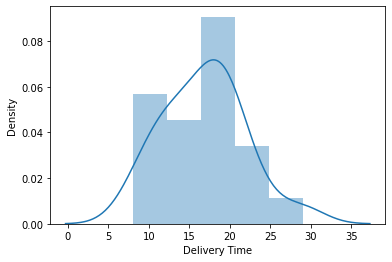

In [ ]:
sns.distplot(data['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


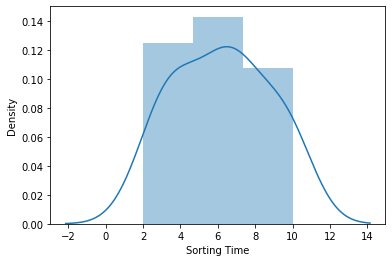

In [ ]:
sns.distplot(data['Sorting Time'])

## Feature engineering

In [ ]:
# Renaming coloumns
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

# Correlation analysis

In [ ]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


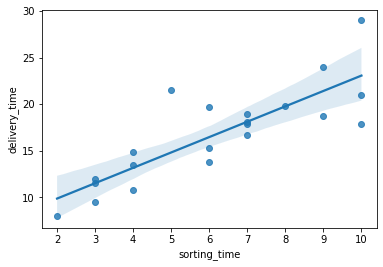

In [ ]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

## Model building

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data=data).fit()

## Model testing

In [ ]:
#finding coefficient parameter
model.params
#y=mx+c ; sorting_time=m ; intercept=c

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
#finding t & p values
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [ ]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Model prediction

In [ ]:
#Manual prediction of delivery time based on sorting time
#lets keep sorting time as 8
predicted_delivery_time = (6.582734) + (1.649020)*(8)
predicted_delivery_time

19.774894

In [ ]:
#Automatic prediction for delivery time for 3,8
newdata= pd.Series([3,8,6,10,4])
newdata

0     3
1     8
2     6
3    10
4     4
dtype: int64

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
data_pred

,sorting_time
0,3
1,8
2,6
3,10
4,4


In [ ]:
model.predict(data_pred)

0    11.529794
1    19.774893
2    16.476853
3    23.072933
4    13.178814
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        11:49:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""